## 2. Mathematical model ##



    To better asses the impact the switch to renewables will have upon the United States economy, we will asses the impact of these changes upon seperate energy sectors: electricity, transportation, and heating. For each of these sectors we will use historical data to forecast future energy usage and then will examine the effect that switch towards renewables has upon the sector. We hope that such analysis will aid in the transition away from fossil fuels.

    To better understand the impact of moving away from use fossil fuels, we plan to construct a set of model that helps us understand the specifics of the transition away from fossil fuels. This model will be a linear model, and will be constructed as follows. The decision variables in our models will be the relative amounts of energy used to meet demand: namely energy derived from solar, wind, hydrothermal, geothermal, nuclear, coal, oil and natural gas. The amounts of energy produced from each of these energy sources serve as the decision variables in our mathematical model. One constraint on our model is that the total carbon emitted by all of the energy sources should remain below the thresholds posed by the Biden adminstration in their most recent report. In addition, the sum of the energy produced by each of the source should meet the sectors energy demand as to ensure a seamless transition between energy types. We aim to minimize the total cost of energy production, we to ensure energy remains affordable to the various sectors. Mathematically, this basic model is described below. 





$$
\begin{aligned}
\underset{c,s,w,ng,o,n,hy,geo \in \mathbb{R^n}}{\text{minimize}}\qquad& Cost(c,s,w,ng,o,n,hy,geo) \\
\text{subject to:}\qquad& f_i(c,s,w,ng,o,n,hy,geo) == \text{Sector_Usage}\\
& CarbonCost(c,s,w,ng,o,n,hy,geo) <= 19.42 * (Sector Contribution) 
\end{aligned}
$$


    In addition to this basic version of the LP, it is important to realize that there are technological limitations upon the amount of energy that is able to be dervied from renewables. As the field of renewable energy is new, the technology has not yet had time to be fully integrated into the electric grid. As such, we need to add an additional set of constraints that map the maximal energy capacity for each renewable. Combining these constraints with the basic model described above gives a more complete model which is mathematically described below. 
$$
\begin{aligned}
\underset{c,s,w,ng,o,n,hy,geo \in \mathbb{R^n}}{\text{minimize}}\qquad& Cost(c,s,w,ng,o,n,hy,geo) \\
\text{subject to:}\qquad& f_i(c,s,w,ng,o,n,hy,geo) == \text{Sector_Usage}\\
& CarbonCost(c,s,w,ng,o,n,hy,geo) <=  Carbon-Cost*(Sector Contribution) \\
& h < \text{Hydroelectric capacity}\\
& s < \text{Solar capacity}\\
& w < \text{wind capacity} \\ 
& g < \text{geothermal capacity} \\
& c+ng+o < \text{reliance ratio * Electricity}
\end{aligned}
$$

## 3.1: Electricity ##

   We first chose to examine the effect of transitioning away from fossil fuels on the electricity sector. To create feasibility model described in the prior section,  we first need to determine future projections of annual electricity consumption in America. We used publicly avaliable information from the US Energy Information Agency to find the annual electricity usage from the years 2000 to 2011. This data is shown below in Figure 1 and was used to construct a least squares model that enabled electricity consumption projections assuming that future consumption follow historical trends. The creation of the least sqaures model for this data set is shown in the subsequent cells. 
   
 




| Year          | Electricity Consumption (billions kwHr)  |
|:------------- |:-------------:| 
| 2000          |    3802.1     |
| 2001          |    3736.6     |
| 2002          |    3858.5     |
| 2003          |    3883.2     |
| 2004          |    3970.6     |
| 2005          |    4055.4     |
| 2006          |    4064.7     |
| 2007          |    4156.7     |
| 2008          |    4119.4     |
| 2009          |    3950.3     |
| 2010          |    4125.1     |
| 2011          |    4105.7     |

                                    Figure 1: Historical Electrcity Consumption (billions kwHr)

In [53]:
using Pkg
Pkg.add("Gurobi");

# Years for which we have data
x = [2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011];


# Energy Values that are associated with those years
y = [3802.1,3736.6,3858.5,3883.2,3970.6,4055.4,4064.7,4156.7,4119.4,3950.3,4125.1,4105.7]; 


# Order of polynomial used for fitting. As we want a linear program, we use k=1.
k = 1

# Create the A matrix (where each row corresponds to one observation x_i and each column is an x^k term)
n = length(x)
A = zeros(n,k+1)

# Creates the matrix that keeps a linear terms and the constant term
for i = 1:n
    for j = 1:k+1
        A[i,j] = float(x[i]^(k+1-j))
    end
end





   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`


In [8]:
using JuMP, Gurobi;

# Creates the model that uses the least squares model.

m = Model(with_optimizer(Gurobi.Optimizer, NumericFocus = 2,NonConvex=2))

# Gives the 2 terms of the linear model
@variable(m, u[1:k+1]);
# Performs a least squares model
@objective(m, Min, sum((y-A*u).^2) );
optimize!(m);

u = value.(u);
print(u);


Set parameter Username
Academic license - for non-commercial use only - expires 2023-03-05
Set parameter NumericFocus to value 2
Set parameter NonConvex to value 2
Set parameter NumericFocus to value 2
Set parameter NonConvex to value 2
Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (mac64[x86])
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 0 rows, 2 columns and 0 nonzeros
Model fingerprint: 0xcedda476
Model has 3 quadratic objective terms
Coefficient statistics:
  Matrix range     [0e+00, 0e+00]
  Objective range  [1e+05, 2e+08]
  QObjective range [2e+01, 1e+08]
  Bounds range     [0e+00, 0e+00]
  RHS range        [0e+00, 0e+00]
Presolve time: 0.00s
Presolved: 0 rows, 2 columns, 0 nonzeros
Presolved model has 3 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 3
 AA' NZ     : 0.000e+00
 Factor NZ  : 1.000e+00
 Factor Ops : 1.000e+00 (less than 1 second per iteration)
 Threads    : 1

                  

In [11]:
# Using above parameters to calculate electricity consumed in various years. 
energy_2030 = 32.263286415071256 * 2025 - 60718.32927583475;
energy_2050 = 32.263286415071256 * 2050 - 60718.32927583475;

    Thus, we know by this above cell that the relationship between the amount of electricity consumed by the United States in any given year is given by
    



$$
\begin{aligned}
{\text{Energy = 32.263286415071256*Year  -60718.32927583475}} \\
\end{aligned}
$$

   Using this information, we can now find the amounts of expected electrcity consumption in America in the years 2030 and 2050. These results are summarized in the table below. 
    
    
| Year          | Electricity Consumption (billions kwHr)  |
|:------------- |:-------------:| 
| 2030          |    4614.82     |
| 2050          |    5421.40  |


The next set of information to construct our model are to calculate the carbon emissions that are valid for the electricity sector to produce in future years. According to a recent report by the Biden administration, the United States aims to reduce its carbon emissions by 10% by 2025 relative to levels in 2005. It also plans to further reduce emissions by 25% in 2030 and 100% in 2050 respectively. According to the United States Energy Department, the amount of carbon emissions due to the electricity sector in the year 2005 were equal to 2416 millions of metric tons. Given the levels of reductions proposed by the Biden administration, we are able to calculated what the target carbon emissions levels are in 2030 and 2050. The results of this analysis are shown below. 

 
 
     
| Year          | Desired Carbon Dioxide Emissions (millions of metric tons)  |
|:------------- |:-------------:| 
| 2030          |    1812     |
| 2050          |     1208 |

 

We now need to calculate cost of producing electricity from a given fuel source. The prices of generating electricity are shown in the following table and were taken from various source which are listed as references. Additionally, the carbon cost of each source to produce 1kWHr of electricity is also shown below and was similarly collected from a wide variety of sources which are listed below.


| Fuel Source          | Electricity Price (cents per kwHr)  |
|:------------- |:-------------:| 
| Coal        |    9.5   |
| Natural Gas          |    7.0   |
| Wind    |    9.7    |
| Hydroelectric          |    8.6   |
| Solar          |    7.0    |
| Nuclear          |    27.5    |
| Geothermal          |   5.0    |
| Oil          |    10.0     |





| Fuel Source          | Carbon Cost (g Carbon-Dioxide per kwHr Electricity Produced)  |
|:------------- |:-------------:| 
| Coal        |    820   |
| Natural Gas          |   490   |
| Wind    |   11.5   |
| Hydroelectric          |    24   |
| Solar          |    50    |
| Nuclear          |    12   |
| Geothermal          |   38    |
| Oil          |   970    |


 

The final part of the constraints is to establish the projected amounts of energy that will be from renewables in 2030 and 2050. This data was collected from the United Department of Energy and sources listed before and we find that in 2030, 14% of total energy is projected to be from solar and 20% of total energy is projected to come from wind energy. We similarly find that 6.5% of energy comes from hydroelectric energy and that .0345% of energy comes from geothermal energy. Using all of this information, we are able construct the models below for the years 2030 and 2050.

In [49]:
using JuMP, Gurobi

m5 = Model(with_optimizer(Gurobi.Optimizer));

# defines the correct variables.
@variable(m5, c>=0); # Energy derived from coal in billions of kWhr 
@variable(m5, ng>=0); # Energy derived from natural gas in billions of kWhr 
@variable(m5, w>=0); # Energy derived from wind in billions of kWhr 
@variable(m5, h>=0); # Energy derived from hydroelectric in billions of kWhr 
@variable(m5, s>=0); # Energy derived from solar energy in billions of kWhr 
@variable(m5, n>=0); # Energy derived from nuclear in billions of kWhr 
@variable(m5, g>=0); # Energy derived from geothermal in billions of kWhr 
@variable(m5, o>=0); # Energy derived from oil in billions of kWhr 



@constraint(m5, s<= 0.14*energy_2030); # Limit on how much energy can be derived from solar by 2030
@constraint(m5, w<= 0.20*energy_2030); # Limit on how much energy can be derived from solar in 2030
@constraint(m5, h<= 0.065*energy_2030); # Limit on how much energy can be derived from hydro-electric by 2030
@constraint(m5, g <= 0.000345*energy_2030); # Limit on the amount of energy that can be derived from geo-thermal energy 
@constraint(m5, ng+o+c == 0.6*energy_2030); # Limit amount of energy derived from fossil fuels

@constraint(m5, c + ng + w + h + s + n + g + o == 4614.825714684543) # Electricity constraint must be met
@constraint(m5, (820*c + 490*ng + 11.5*w + 24*h + 50*s + 12*n + 38*g + 970*o)/(10^12) <= 1812  ); # Carbon emission constraint
@objective(m5, Min, (9.5*c + 7.0*ng + 9.7*w + 8.6*h + 7.0*s + 27.5*n + 5.0*g + 10.0 *o ) *10^7) # Objective in dollars

optimize!(m5)

println("Energy from Coal in Billions of kWhr: ", value(c));
println("Energy from Natural Gas in kWhr: ", value(ng));
println("Energy from Wind in Billions of kWhrs: ",value(w));
println("Energy from Hydroelectric in Billions of kWhrs: ",value(h))
println("Energy from Solar in Billions of kWhr: ",value(s))
println("Energy from Nuclear in Billions of kWhr:",value(n))
println("Energy from Geothermal in Billions of kWhr: ",value(g))
println("Energy from Oil in Billions of kWhr: ",value(o))

coal_2030 = value(c);
ng_2030 = value(ng);
w_2030 = value(w);
h_2030 = value(h);
s_2030 = value(s);
n_2030 = value(n);
g_2030 = value(g);
o_2030 = value(o);



Set parameter Username
Academic license - for non-commercial use only - expires 2023-03-05
Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (mac64[x86])
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 7 rows, 8 columns and 23 nonzeros
Model fingerprint: 0xecd6ab57
Coefficient statistics:
  Matrix range     [1e-11, 1e+00]
  Objective range  [5e+07, 3e+08]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+00, 5e+03]
Presolve removed 6 rows and 3 columns
Presolve time: 0.00s
Presolved: 1 rows, 5 columns, 5 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.8611919e+11   2.305423e+02   0.000000e+00      0s
       1    3.5205945e+11   0.000000e+00   0.000000e+00      0s

Solved in 1 iterations and 0.00 seconds (0.00 work units)
Optimal objective  3.520594468e+11

User-callback calls 50, time in user-callback 0.00 sec
Energy from Coal in Billions of kWhr: 0.0
Energy from Natural Gas in kWhr: 2768.8954

We can repeat a similar analysis for the projected energy usage in 2050 using the appropriate energy projection and the appropriate carbon constraints. The resulting model is shown below

In [50]:
using JuMP, Gurobi

m6 = Model(with_optimizer(Gurobi.Optimizer));

# defines the correct variables.
@variable(m6, c>=0); # Energy derived from coal in billions of kWhr 
@variable(m6, ng>=0); # Energy derived from natural gas in billions of kWhr 
@variable(m6, w>=0); # Energy derived from wind in billions of kWhr 
@variable(m6, h>=0); # Energy derived from hydroelectric in billions of kWhr 
@variable(m6, s>=0); # Energy derived from solar energy in billions of kWhr 
@variable(m6, n>=0); # Energy derived from nuclear in billions of kWhr 
@variable(m6, g>=0); # Energy derived from geothermal in billions of kWhr 
@variable(m6, o>=0); # Energy derived from oil in billions of kWhr 



@constraint(m6, s<= 0.20*energy_2050); # Limit on how much energy can be derived from solar by 2030
@constraint(m6, w<= 0.35*energy_2050); # Limit on how much energy can be derived from solar in 2030
@constraint(m6, h<= 0.065*energy_2050); # Limit on how much energy can be derived from hydro-electric by 2030
@constraint(m6, g <= 0.000345*energy_2050); # Limit on the amount of energy that can be derived from geo-thermal energy 
@constraint(m6, ng+o+c == 0.6*energy_2050); # Limit amount of energy derived from fossil fuels

# Electricity constraint must be met
@constraint(m6, c + ng + w + h + s + n + g + o == energy_2050) 

# Carbon emission constraint for 2050
@constraint(m6, (820*c + 490*ng + 11.5*w + 24*h + 50*s + 12*n + 38*g + 970*o)/(10^12) <= 1208  ); 

# Objective in dollars
@objective(m6, Min, (9.5*c + 7.0*ng + 9.7*w + 8.6*h + 7.0*s + 27.5*n + 5.0*g + 10.0 *o ) *10^7) 

optimize!(m6)

println("Energy from Coal in Billions of kWhrs: ", value(c));
println("Energy from Natural Gas in Billions of kWhrs: ", value(ng));
println("Energy from Wind in Billions of kWhrs: ",value(w));
println("Energy from Hydroelectric in Billions of kWhrs: ",value(h))
println("Energy from Solar in Billions of kWhr: ",value(s))
println("Energy from Nuclear in Billions of kWhrs:",value(n))
println("Energy from Geothermal in Billions of kWhrs: ",value(g))
println("Energy from Oil in Billions of kWhrs: ",value(o))

coal_2050 = value(c);
ng_2050 = value(ng);
w_2050 = value(w);
h_2050 = value(h);
s_2050 = value(s);
n_2050 = value(n);
g_2050 = value(g);
o_2050 = value(o);



Set parameter Username
Academic license - for non-commercial use only - expires 2023-03-05
Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (mac64[x86])
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 7 rows, 8 columns and 23 nonzeros
Model fingerprint: 0xcc08ccd9
Coefficient statistics:
  Matrix range     [1e-11, 1e+00]
  Objective range  [5e+07, 3e+08]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+00, 5e+03]
Presolve removed 6 rows and 3 columns
Presolve time: 0.00s
Presolved: 1 rows, 5 columns, 5 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    3.3612729e+11   2.708366e+02   0.000000e+00      0s
       1    4.0480994e+11   0.000000e+00   0.000000e+00      0s

Solved in 1 iterations and 0.00 seconds (0.00 work units)
Optimal objective  4.048099390e+11

User-callback calls 50, time in user-callback 0.00 sec
Energy from Coal in Billions of kWhr: 0.0
Energy from Natural Gas in kWhr: 3252.8447

We finally look at the theoretical case where we highly restrict the usage offossil fuels in Electricity Generation. The model that acheives this is shown below.

In [67]:
using JuMP, Gurobi

m6 = Model(with_optimizer(Gurobi.Optimizer));

# defines the correct variables.
@variable(m6, c>=0); # Energy derived from coal in billions of kWhr 
@variable(m6, ng>=0); # Energy derived from natural gas in billions of kWhr 
@variable(m6, w>=0); # Energy derived from wind in billions of kWhr 
@variable(m6, h>=0); # Energy derived from hydroelectric in billions of kWhr 
@variable(m6, s>=0); # Energy derived from solar energy in billions of kWhr 
@variable(m6, n>=0); # Energy derived from nuclear in billions of kWhr 
@variable(m6, g>=0); # Energy derived from geothermal in billions of kWhr 
@variable(m6, o>=0); # Energy derived from oil in billions of kWhr 



@constraint(m6, s<= 0.20*energy_2050); # Limit on how much energy can be derived from solar by 2030
@constraint(m6, w<= 0.35*energy_2050); # Limit on how much energy can be derived from solar in 2030
@constraint(m6, h<= 0.065*energy_2050); # Limit on how much energy can be derived from hydro-electric by 2030
@constraint(m6, g <= 0.000345*energy_2050); # Limit on the amount of energy that can be derived from geo-thermal energy 
@constraint(m6, ng+o+c == 0.05*energy_2050); # Limit amount of energy derived from fossil fuels

# Electricity constraint must be met
@constraint(m6, c + ng + w + h + s + n + g + o == energy_2050) 

# Carbon emission constraint for 2050
@constraint(m6, (820*c + 490*ng + 11.5*w + 24*h + 50*s + 12*n + 38*g + 970*o)/(10^12) <= 1208  ); 

# Objective in dollars
@objective(m6, Min, (9.5*c + 7.0*ng + 9.7*w + 8.6*h + 7.0*s + 27.5*n + 5.0*g + 10.0 *o ) *10^7) 

optimize!(m6)

println("Energy from Coal in Billions of kWhrs: ", value(c));
println("Energy from Natural Gas in Billions of kWhrs: ", value(ng));
println("Energy from Wind in Billions of kWhrs: ",value(w));
println("Energy from Hydroelectric in Billions of kWhrs: ",value(h))
println("Energy from Solar in Billions of kWhr: ",value(s))
println("Energy from Nuclear in Billions of kWhrs:",value(n))
println("Energy from Geothermal in Billions of kWhrs: ",value(g))
println("Energy from Oil in Billions of kWhrs: ",value(o))

coal_hypo = value(c);
ng_hypo = value(ng);
w_hypo = value(w);
h_hypo = value(h);
s_hypo = value(s);
n_hypo = value(n);
g_hypo = value(g);
o_hypo = value(o);



Set parameter Username
Academic license - for non-commercial use only - expires 2023-03-05
Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (mac64[x86])
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 7 rows, 8 columns and 23 nonzeros
Model fingerprint: 0x27a2f595
Coefficient statistics:
  Matrix range     [1e-11, 1e+00]
  Objective range  [5e+07, 3e+08]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+00, 5e+03]
Presolve removed 7 rows and 8 columns
Presolve time: 0.00s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    8.0826347e+11   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.00 seconds (0.00 work units)
Optimal objective  8.082634689e+11

User-callback calls 42, time in user-callback 0.00 sec
Energy from Coal in Billions of kWhrs: 0.0
Energy from Natural Gas in Billions of kWhrs: 271.0703937530663
Energy from Wind in Billions of kWhrs: 1897.

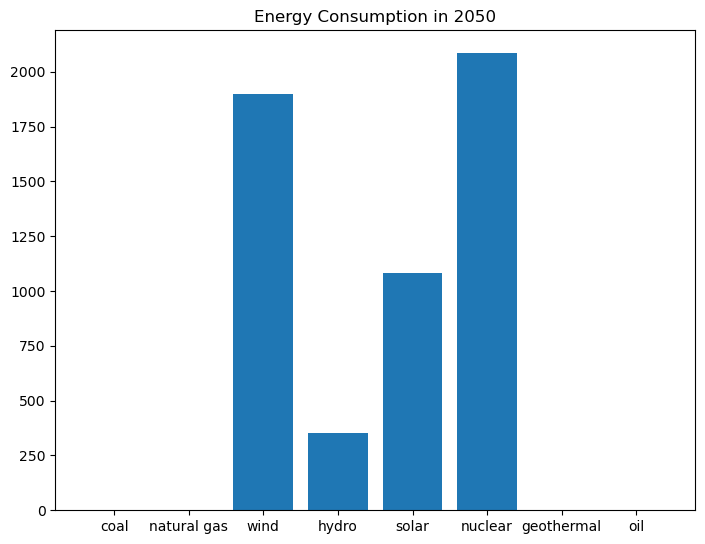

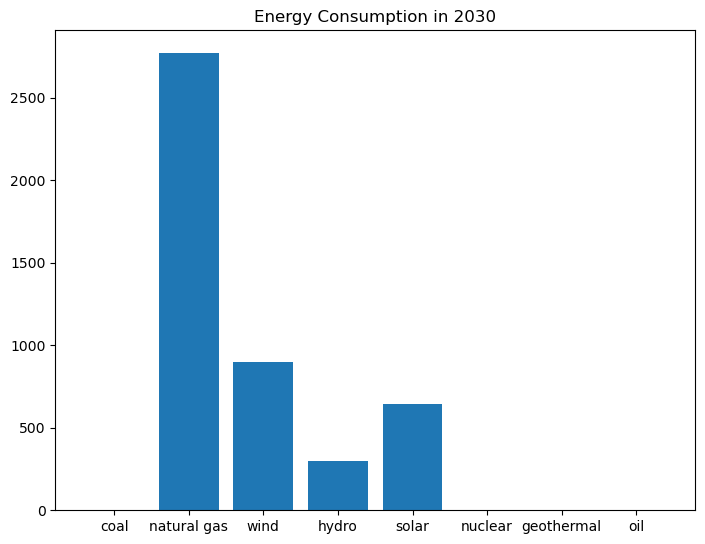

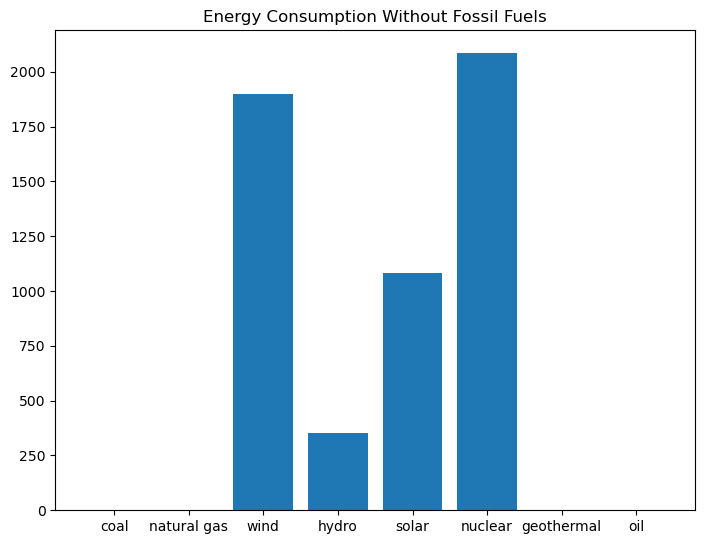

sys:1: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
sys:1: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
sys:1: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


In [66]:
using PyPlot

amounts_2030 = [coal_2030, ng_2030, w_2030, h_2030, s_2030, n_2030, g_2030, o_2030];
amounts_2050 = [coal_2050, ng_2050 , w_2050, h_2050, s_2050, n_2050, g_2050, o_2050];
amounts_hypo = [coal_hypo, ng_hypo, w_hypo, h_hypo, s_hypo, n_hypo, g_hypo, o_hypo];

energy = ["coal", "natural gas", "wind", "hydro","solar","nuclear","geothermal","oil"]



fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(energy,amounts_2050)
plt.title("Energy Consumption in 2050")
fig.show()


fig1 = plt.figure()
ax1 = fig1.add_axes([0,0,1,1])
ax1.bar(energy,amounts_2030)
plt.title("Energy Consumption in 2030")
fig1.show()


fig1 = plt.figure()
ax1 = fig1.add_axes([0,0,1,1])
ax1.bar(energy,amounts_hypo)
plt.title("Energy Consumption Without Fossil Fuels")
fig1.show()

### Results

   From the results of our model, we can see thaat it is indeed possible to meet the projected energy goals set by the Biden administration by the years 2030 and 2050 should US electricity demand follow historical trends and renewnable technology progress as intended. The transition between 2030 shows how as renewable technology continues to become more broadly widespread, it will have the effect of reducing natural gas consumption and thus help the electricity sector move away from fossil fuel dependance. Another interesting fact to note is that the price of overall electricity generation increased slighly between the two years in question. The projected cost of electricity generation during 2030 would be around 358 billion dollars while the estimated cost for electricity generation during 2050 instead ranges around 411 billion dollars. This price change may mark a potentially worrying trend to consumers as an increase in the price of electricity generation would likely drive up the prices of all other economic services  causing stress on ordinary consumers. In addition, it can be seen that although no bounds were placed upon nuclear energy, coal, or oil, none of each type was chosen for fuel in our model. This suggests that these energy sources may not be as efficient as solar and wind energy for producing electricity.

  Although this model was able to establish the validity of projected carbon emisison goals, it made several simplifications which may lead to some innacuracies. Some such assumption that this model made was that cost of renewable energy was just the cost of electricity generation. In reality, there exist additional maintenence costs associated with the upkeep of these renewable energy sources and integrating them into the existing electric grid is costly adn expensive. As such, the cost of such installation is not considered within this model making this model an over-simplification. Another assumption made in this model is that all sources of renewable energy are evenly distriuted across the country. One of the major advantages of fossil fuels is their acessibility: regardless of where you are in the United States, fossil fuels will always generate the same amount of energy making them an extremely relaible source of energy. The same cannot be same about renewables as specific locations may contain differing amounts of avaliable renewables. This can be seen in the following images taken from the Natural Renewable Energy Laboratory which shows the varying ditribution of Solar, Wind and Geothermal Energy across the United States.
    
   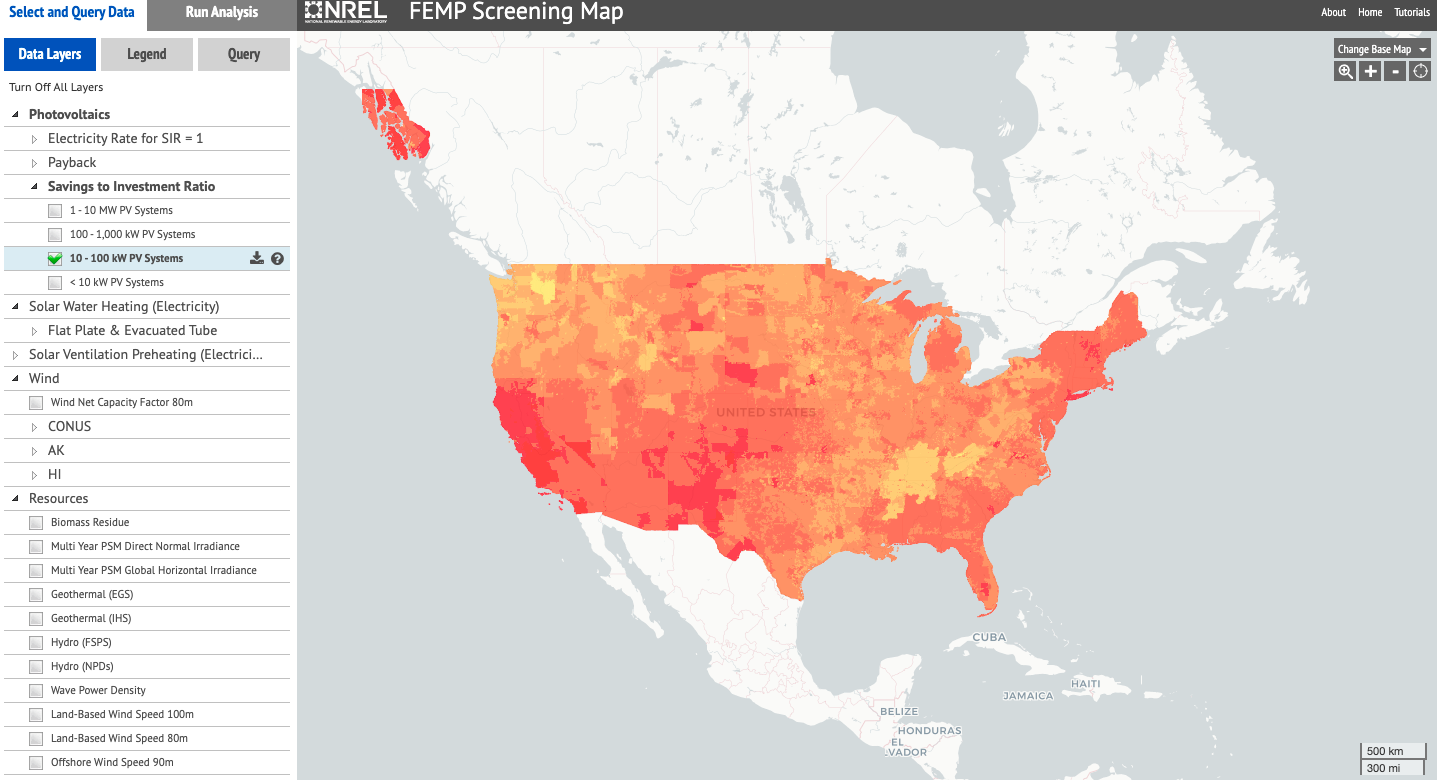
   
   

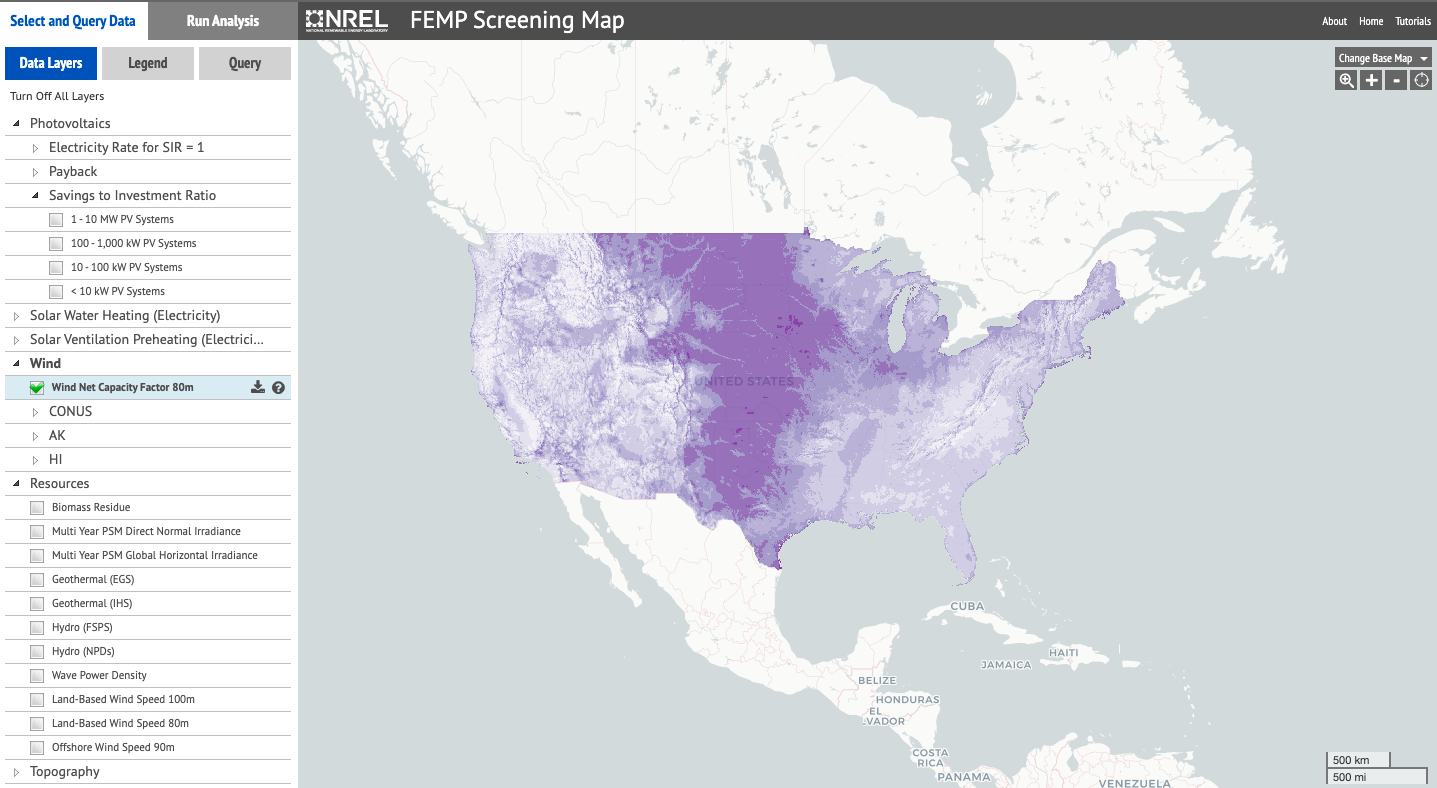

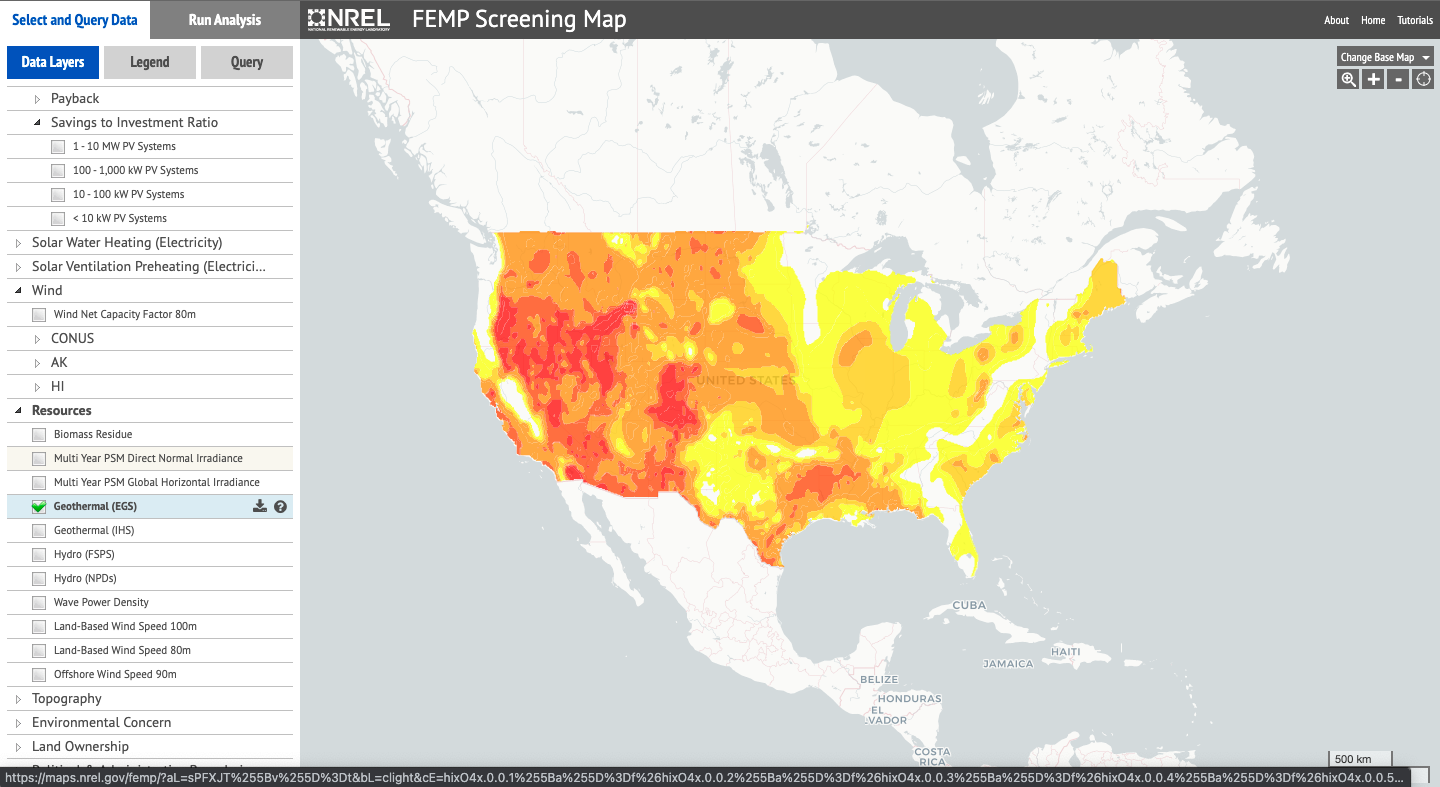

The large disparities between the energy avaliability may prove to be difficult as ensuring that all reigions of the United States are able to have enough energy at any given moment would require a tremendous amount of coordination across multiple regions of the United States. 



   In our final model, we consider the case where we rely almost exclusively upon renewable energy sources for electricity generation mirroring the hopes of many for the future. In the results of this model, we can see that electricity generating shifts away from relying upon natural gas to instead rely upon solar, wind, and nuclear energy sources. All three of these energy sources have major limitations associated with them. Both solar and wind energy are difficult to harvest and store efficiently in batteries, and pose problems synching to the correct frequencies to match the levels of the grid. In addition, solar and wind energy is not constant and may fluctate on a day to day basis. This variability may be extremely destructive to the electrical grid as any excess demand on a particuar day when solar and wind energy supply is low may place extra burden upon the electrical system. Another issue with fully switching to renewables is the increased reliance of nuclear energy. Although nuclear energy does not produce the same levels of carbon-dioxide as convential fossil fuels do, it is still based on a naturally occuring element: Uranium. As such, relying soley upon Uranium to provide the majortiy of the country's energy needs does not solve the problem of eventually running out of energy sources. Another major issue with the usage of nuclear energy is the problem of nuclear waste. Nuclear reactors generate large quantities of higly radioactive waste that remains dangerous for hundreds of thousands of years. To be able to rely upon nuclear energy more sucessfully, we must first discuss a long-term solution of the safe treatment and disposal of this nuclear waste. In  Taddition to the concerns about the efficacy of the fully renewable model, it comes at a much higher cost to consumer costing nearly 800 billion dollars to generate the projected amount of electricity. This is almost double what is expected of the other models, and serves as another limitation upon the viability of a fully renewable energy system.
   
   
   Overall, the reuslts of this model show that with additional investment into renewables, it is highly likely that we are able to meet the deadliens pushed by the Biden administration. Full dependence on renewable energy still remains unobtainable given current techonology and will take massive overhauls to the electric grid and current infrasturcture to acheive. 

Sources:

https://www.eia.gov/outlooks/steo/report/electricity.php#:~:text=We%20estimate%20that%20the%20U.S.,by%2013%20GW%20in%202021.

https://www.greentechmedia.com/articles/read/wind-could-make-up-one-third-of-us-electricity-generation-by-2050#:~:text=Wind%20Markets%20%26%20Policy-,Energy%20Department%20Says%20Wind%20Could%20Make%20Up%2035%25%20of%20US,404%20gigawatts%20by%20mid%2Dcentury.

https://www.eia.gov/todayinenergy/detail.php?id=37392#:~:text=Carbon%20dioxide%20emissions%20from%20the,have%20declined%2028%25%20since%202005&text=U.S.%20electric%20power%20sector%20carbon,fuels%20used%20to%20generate%20electricity.

https://maps.nrel.gov/femp/?aL=sPFXJT%255Bv%255D%3Dt&bL=clight&cE=hixO4x.0.0.1%255Ba%255D%3Df%26hixO4x.0.0.2%255Ba%255D%3Df%26hixO4x.0.0.3%255Ba%255D%3Df%26hixO4x.0.0.4%255Ba%255D%3Df%26hixO4x.0.0.5%255Ba%255D%3Df%26hixO4x.0.0.6%255Ba%255D%3Df%26hixO4x.0.0.7%255Ba%255D%3Df%26hixO4x.0.0.8%255Ba%255D%3Df&lR=0&mC=37.47485808497102%2C-89.56054687499999&zL=4


https://www.eia.gov/totalenergy/data/annual/showtext.php?t=ptb0802a


http://groundtruthtrekking.org/Reports/Coal-Electricity-Prices-Externalities-Analysis/1/Coal-Electricity-Prices-Externalities-Levelized-Cost/

https://impactful.ninja/energy-sources-with-the-highest-carbon-footprint/#:~:text=Oil%2C%20coal%2C%20natural%20gas%2C,have%20various%20other%20environmental%20drawbacks.

https://www.americanprogress.org/article/the-staggering-cost-of-new-nuclear-power/

